845.34678 
845.34678 
845.34678 


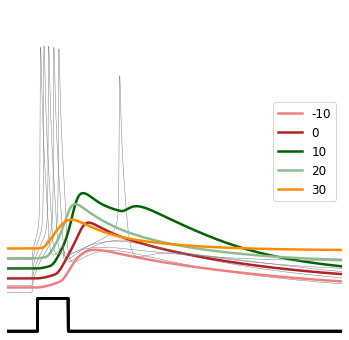

In [1]:
import os
import sys
import numpy as np
import neuron
from neuron import h
from neuron.units import ms, mV
from neuron import gui
from matplotlib import pyplot as plt
import csv
from math import exp, log
import scipy

h.load_file("import3d.hoc")
morphology_file = "morphologies/cell1.asc"
h.load_file("L5PCbiophysWhat.hoc")
h.load_file("L5PCtemplate_2.hoc")
L5PC = h.L5PCtemplate(morphology_file)
h.celsius = 37
shift = -10
multHVA = 1
apic_secs = list(L5PC.all)
plt.rcParams['figure.figsize'] = [6,6] 
fig, (top_ax, bot_ax) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [8, 1]})
listOfColors = ['lightcoral','firebrick','darkgreen','darkseagreen','darkorange']
for x in listOfColors:
    for sec in apic_secs:
        for seg in sec:
            try: seg.Ih.vshift = seg.Ih.vshift + shift
#             try: seg.Ca_HVA.gCa_HVAbar = seg.Ca_HVA.gCa_HVAbar*multHVA
            except AttributeError: continue 
    t = h.Vector().record(h._ref_t)
    som_v = h.Vector().record(L5PC.soma[0](0.5)._ref_v)
    distal_v = h.Vector().record(L5PC.apic[36](0.9)._ref_v)
    proximal_v = h.Vector().record(L5PC.apic[20](0.5)._ref_v)

#     current_epsp = h.epsp(L5PC.apic[36](0.9))
#     current_epsp.tau0 = 0.6
#     current_epsp.tau1 = 7
#     current_epsp.imax = 2
#     current_epsp.onset = 505

    current_som = h.IClamp(L5PC.soma[0](0.5))
    current_som.delay = 500
    current_som.dur = 5 
    current_som.amp = 1.9

    soma_cur = h.Vector().record(current_som._ref_i)
#     cur_i = h.Vector().record(current_epsp._ref_i)

    v_rest = -80.28

    h.finitialize(v_rest*mV)
    h.continuerun(650*ms)

    top_ax.plot(t, som_v, 'gray', linewidth=0.5)
    top_ax.plot(t, distal_v, x, linewidth=2.5, label= shift)
#     top_ax.plot(t, proximal_v, 'deepskyblue', linewidth=2.5, label='proximal dend')
    top_ax.set(ylim=(-85,60), xlim=(496,550))
    top_ax.get_xaxis().set_ticks([])
    top_ax.get_yaxis().set_ticks([])
    top_ax.spines['top'].set_visible(False)
    top_ax.spines['right'].set_visible(False)
    top_ax.spines['bottom'].set_visible(False)
    top_ax.spines['left'].set_visible(False)
    top_ax.legend(loc = 'center right',fontsize=12)

    bot_ax.plot(t, soma_cur, 'k', linewidth=2.5, label='soma')
#     bot_ax.plot(t, -1*cur_i, 'k', linewidth=2, label='dend')
    bot_ax.set( xlim=(495,550))
    bot_ax.get_xaxis().set_ticks([])
    bot_ax.get_yaxis().set_ticks([])
    bot_ax.spines['top'].set_visible(False)
    bot_ax.spines['right'].set_visible(False)
    bot_ax.spines['bottom'].set_visible(False)
    bot_ax.spines['left'].set_visible(False)
    #top_ax.axhline(y=v_rest, color='k', linestyle=':', linewidth=1)
    plt.subplots_adjust(wspace=0, hspace=0)
    for sec in apic_secs:
        for seg in sec:
            try: seg.Ih.vshift = seg.Ih.vshift - shift
#             try: seg.Ca_HVA.gCa_HVAbar = seg.Ca_HVA.gCa_HVAbar/multHVA
            except AttributeError: continue 
    shift = shift +10
    multHVA = multHVA +0.4

plt.show()
    
